# ANALYSIS OF FX ONE TOUCH OPTIONS

In this notebook I show how you can analyse FX One Touch options.

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from financepy.utils import *
from financepy.products.fx import *
from financepy.market.curves import *

# Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [43]:
value_dt = Date(10, 4, 2020)

In [44]:
for_name = "EUR"
dom_name = "USD"
for_cc_rate = 0.03460  # EUR
dom_cc_rate = 0.02940  # USD

In [45]:
domestic_curve = DiscountCurveFlat(value_dt, dom_cc_rate)
foreign_curve = DiscountCurveFlat(value_dt, for_cc_rate)

In [46]:
currency_pair = for_name + dom_name
spot_fx_rate = 1.3465        

In [47]:
expiry_dt = value_dt.add_tenor("1Y")

In [48]:
strike_price = 1.362024

We now create the option object

In [49]:
one_touch = FXOneTouchOption(expiry_dt, TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY, 1.0)

In [50]:
print(one_touch)

OBJECT TYPE: FXOneTouchOption
EXPIRY DATE: 10-APR-2021
OPTION TYPE: TouchOptionTypes.DOWN_AND_IN_ASSET_AT_EXPIRY
BARRIER LEVEL: 1.0
PAYMENT SIZE: 1.0


## Valuation Dependency on Spot FX Rate

To do a valuation we need to specify the date and set the market inputs

In [51]:
spot_fx_rate = np.linspace(1.1,3.0,50)

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [52]:
volatility = 0.20
model = BlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [53]:
v_anal = one_touch.value(value_dt, spot_fx_rate, domestic_curve, foreign_curve, model)

USE WITH CAUTION. MORE TESTING REQUIRED.


In [54]:
v_mc = []

for s in spot_fx_rate:
    v = one_touch.value_mc(value_dt, s, domestic_curve, foreign_curve, model)
    v_mc.append(v)
    
len(v_mc)

THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED
THIS NEEDS TO BE CHECKED


50

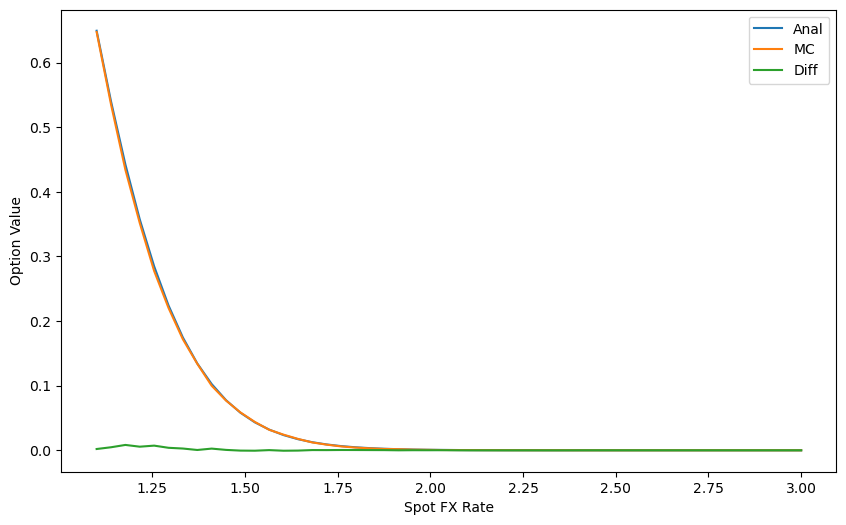

In [55]:
plt.figure(figsize=(10,6))

plt.plot(spot_fx_rate, v_anal, label = "Anal")
plt.plot(spot_fx_rate, v_mc, label = "MC")
plt.plot(spot_fx_rate, (v_anal - v_mc)*1, label = "Diff")

plt.xlabel("Spot FX Rate")
plt.ylabel("Option Value");
plt.legend()

Copyright (c) 2020, Dominic O'Kane 